# CSCI B505 – Lab 3

## Dong Liang


## Implement Merge Sort 

In [226]:
def merge_sort(A):

    if len(A) > 1:
        mi = int(len(A)/2)
        left = A[:mi]
        right = A[mi:]
        
        merge_sort(left)
        merge_sort(right)   
        
        left.append(float("inf"))
        right.append(float("inf"))

        i = 0 
        j = 0
        k = 0
        
        while i <= len(left) and j <= len(right) and k < len(A):
            if left[i] <= right[j]:
                A[k] = left[i]
                i += 1
            else:
                A[k] = right[j]
                j += 1
            k += 1
            

### Self check

In [227]:
A = [5,8,3,3,6,8,22,6,1]
merge_sort(A)
A

[1, 3, 3, 5, 6, 6, 8, 8, 22]

## Algorithm implementation of deterministic selection

In [228]:
def insertion_sort(A):
    for i in range(1,len(A)): 
                 
        currentvalue = A[i]     
        pos = i             
        
        while pos>0 and A[pos-1]>currentvalue:
            
            A[pos]=A[pos-1]
            pos -= 1

        A[pos]=currentvalue     
        
        
def findMedian(A):
    assert len(A) > 0
    
    # sort
    insertion_sort(A)
    
    # get median
    mi = int((len(A) + 1)/2) - 1
    return A[mi] 

def findMedianOfMedians(A):
    if len(A) <= 5:
        return findMedian(A)
    
    # split into n/5 groups
    grp = {}

    n = int(len(A)/5)
    mod = len(A) % 5
    runs = n + (1 if mod > 0 else 0)
    
    for i in range(runs):
        grp[i] = []

    
    j = 0
    for i in range(len(A)):
        grp[j].append(A[i])
        
        if (i + 1) % 5 == 0 and i + 1 != len(A):
            j += 1
    
    # find the median for each group
    medians = [findMedian(v) for v in grp.values() if len(v) != 0]
    
    # recursively find the median of medians
    medianOfMedians = SELECT(medians, int((len(medians) + 1)/2) - 1)
    
    return medianOfMedians 


def SELECT(A, i):
    
    if i < 0 or i > len(A):
        raise ValueError(f'i must be less than {len(A)} and greater than 0')

    # base case
    if len(A) == 1:
        return A[0]

    # partition
    x = findMedianOfMedians(A)
    
    left = [el for el in A if el <= x]
    right = [el for el in A if el > x]
    p = len(left)
    
    # find ith element
    if p == i:
        return x
    elif i < p:
        return SELECT(left, i)  
    else:
        return SELECT(right, i - p)
        

### Self check

In [229]:
A = list(range(10))
print(A)
SELECT(A,5)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


4

## Running time of Merge Sort

In [230]:
import numpy as np
import pandas as pd
import time

In [231]:
# Load data
numbers = np.loadtxt('input-programming-3.txt').tolist()

In [232]:
def get_average_running_time(arr, FUNC, **kwargs):
    running_times = list()
    for i in range(3):
        start = time.time()
        FUNC(A = arr, **kwargs)
        end = time.time()
        delta = end - start
        running_times.append(delta)
    return np.mean(running_times)

In [233]:
rt = dict()
for n in range(5000, 105000, 5000):
    rt[n] = get_average_running_time(numbers[:n], merge_sort)

## Visually plot the measurements 

In [234]:
import matplotlib.pyplot as plt
def plot_measurements(obs):
    plt.style.use('default')
    plt.plot(list(obs.keys()), list(obs.values()), 'o-', label = 'Merge Sort')
    plt.xlabel('Sample size (n)')
    plt.ylabel('Average running time (seconds)')
    plt.grid()
    plt.legend()
    plt.title('Visualization of average running times (Merge Sort)')
    plt.gcf().set_size_inches(8, 6)

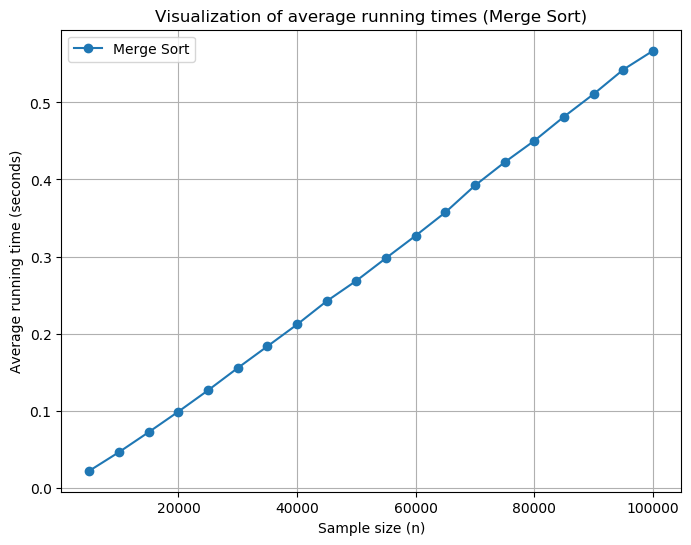

In [235]:
plot_measurements(rt)